## Airbnb listing Broward County, FL

Task 6.4 Regression analysis

Contents:

1. Importing libraries and Data
2. Data cleaning
3. Data preparation for regression analysis
4. Regression analysis
5. Bonus: performance improvement after removing outliers

# 1 Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_airbnb = pd.read_csv(r'D:\CareerFoundry\Data Immersion\Task 6\AirBnB Broward County FL Data\02 Data\Prepared data\2021_09 Airbnb Broward County_wrangled for distance to the beach.csv')

# 2 Data cleaning

In [3]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11950 entries, 0 to 11949
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   property_id                     11950 non-null  int64  
 1   collection_date                 11950 non-null  object 
 2   listing_name                    11950 non-null  object 
 3   host_id                         11950 non-null  int64  
 4   neighbourhood                   11950 non-null  object 
 5   latitude                        11950 non-null  float64
 6   longitude                       11950 non-null  float64
 7   room_type                       11950 non-null  object 
 8   price                           11950 non-null  int64  
 9   minimum_nights                  11950 non-null  int64  
 10  number_of_reviews               11950 non-null  int64  
 11  last_review                     9500 non-null   object 
 12  reviews_per_month               

Renaming the column

In [4]:
df_airbnb.rename(columns = {'-80.0728500' : 'beach_longitude'}, inplace = True)

Missing values check

In [5]:
df_airbnb.isnull().sum()

property_id                          0
collection_date                      0
listing_name                         0
host_id                              0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2450
reviews_per_month                 2450
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
beach_longitude                      0
distance_to_beach                    0
dtype: int64

Duplicates check

In [6]:
dups = df_airbnb.duplicated()

In [7]:
dups.shape

(11950,)

Extreme values check

C:\Users\shwal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

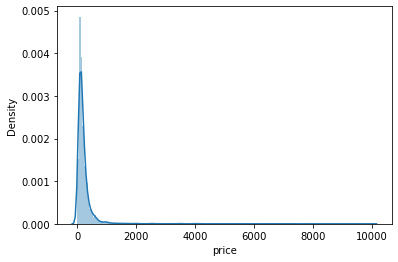

In [10]:
sns.distplot(df_airbnb['price'], bins=170) # Shows extreme values

In [ ]:
# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [11]:
df_airbnb['price'].mean() # Check the mean

226.39589958158996

In [12]:
df_airbnb['price'].median() # Check the median

148.0

In [13]:
df_airbnb['price'].max() # Check the max

10000

# 3 Data preparation for regression analysis

Hypothesis: the smaller the distance to the beach, the higher the booking price per night

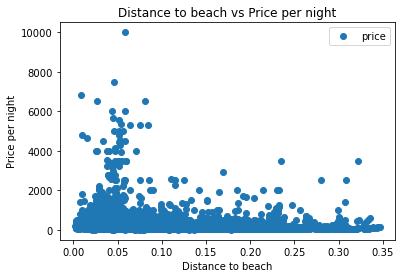

In [14]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_airbnb.plot(x = 'distance_to_beach', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Distance to beach vs Price per night')  
plt.xlabel('Distance to beach')  
plt.ylabel('Price per night')  
plt.show()

In [15]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_airbnb['distance_to_beach'].values.reshape(-1,1)
y = df_airbnb['price'].values.reshape(-1,1)

In [16]:
X

array([[0.05152  ],
       [0.04767  ],
       [0.06916  ],
       ...,
       [0.0457602],
       [0.06204  ],
       [0.10432  ]])

In [17]:
y

array([[191],
       [110],
       [ 99],
       ...,
       [182],
       [290],
       [ 41]], dtype=int64)

In [18]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4 Regression analysis

In [19]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [20]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

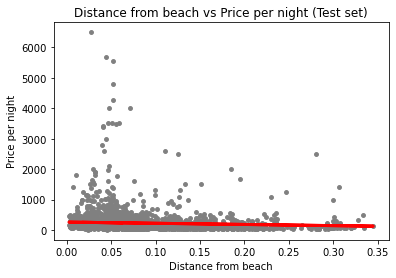

In [22]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Distance from beach vs Price per night (Test set)')
plot_test.xlabel('Distance from beach')
plot_test.ylabel('Price per night')
plot_test.show()

Comment:
The linear model represented by the red regression line doesn't perfectly cover all data points. In the area where the distance to the beach is small (less than 0.10), there are still many points indicating low price, which contradicts my hypothesis.

To additionally check the accuracy of the model, summary statistics and dataframe with predicted values are applied below.

In [23]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [24]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-385.38702405]]
Mean squared error:  114512.13642292196
R2 score:  0.00400627423650568


In [25]:
y_predicted

array([[249.49990121],
       [232.18060835],
       [211.19628489],
       ...,
       [237.70320441],
       [198.06229511],
       [232.92825918]])

In [26]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,367,249.499901
1,590,232.180608
2,50,211.196285
3,276,243.023858
4,209,248.220416
5,134,229.787355
6,120,247.650043
7,180,205.087901
8,99,232.989921
9,400,196.963942


Compare how the regression fits the training set

In [27]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [28]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [29]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-385.38702405]]
Mean squared error:  147005.3415728195
R2 score:  0.00351667711631376


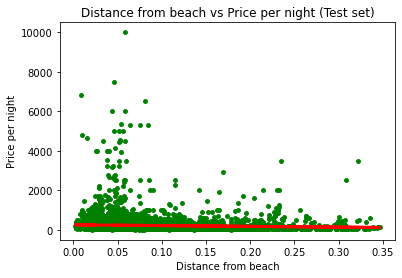

In [30]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Distance from beach vs Price per night (Test set)')
plot_test.xlabel('Distance from beach')
plot_test.ylabel('Price per night')
plot_test.show()

Comment:

A negative slope value indicates a negative relationship: when distance to the beach rises, the price per night drops. The slope drops at a degree of 385.

The root mean squared error tells how close a regression line is to a set of points. It looks like the distance from the points to the regression line is pretty large (114512) indicating that the regression line isnt't an accurate representation of the data.

The R2 score is a metric that tells how well the model explains the variance in the data: values closer to 0 indicate a poor fit, and values closer to 1 indicate a good fit. The R2 score in my model is 0.004 which is 0.4 percent. It is a very low percentage meaning that the model isn't a great fit.

A dataframe of y values and their predicted values is another manual check for the model's accuracy. This dataframe let my physically see that there is a quite big difference between the two. This just adds evidence to the fact that the model doesn't explain well the relationship between both variables. The relatioship doesn't follow a single, stright regression line.

By performing the operations above, I confirmed the inaccuracy of the model, so I can also rule out the hypothesis, "the smaller the distance to the beach, the higher the booking price per night". 

It turned out that this statement is only partially true and there are most likely other factors influencing the price than only the distance to the beach. It is an important factor in pricing where the distance is large, but it doesn't play as large role when there's less distance. 
I would need to create a multiple regression model with more predictors.

# 5 Bonus: performance improvement after removing outliers

In [31]:
# Clean the extreme values from the "price" variable observed during the consistency checks.

df_test = df_airbnb[df_airbnb['price'] <=2000] 

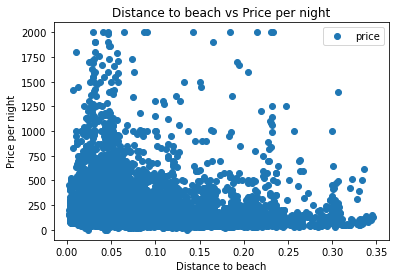

In [32]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'distance_to_beach', y='price', style='o')  
plt.title('Distance to beach vs Price per night')  
plt.xlabel('Distance to beach')  
plt.ylabel('Price per night')  
plt.show()

In [33]:
# Reshape again.

X_2 = df_test['distance_to_beach'].values.reshape(-1,1)
y_2 = df_test['price'].values.reshape(-1,1)

In [34]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [35]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [36]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [37]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [38]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-319.17730741]]
Mean squared error:  40298.77131205188
R2 score:  0.008268365276036693


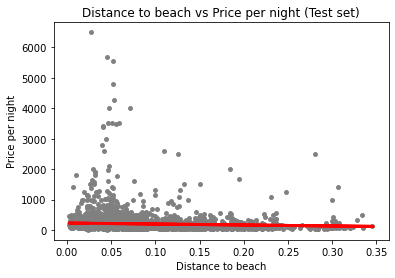

In [39]:
# Visualizing the test set results.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_train, regression.predict(X_train), color='red', linewidth =3)
plot_test.title('Distance to beach vs Price per night (Test set)')
plot_test.xlabel('Distance to beach')
plot_test.ylabel('Price per night')
plot_test.show()

In [41]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)


,Actual,Predicted
0,158,209.657950
1,85,183.849273
2,500,164.092198
3,989,166.683918
4,298,213.896625
5,74,197.305789
6,153,211.694302
7,158,211.087865
8,136,201.818956
9,75,134.143791
